In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/Colab Notebooks/bigdata

/content/drive/MyDrive/Colab Notebooks/bigdata


In [ ]:
df = pd.read_csv('data.csv')
df.shape

(200092, 331)

In [ ]:
df_info = pd.read_csv('info.csv')
df_info.shape

(200092, 41)

In [ ]:
df_info.columns

Index(['CUST_LOCATION_1', 'CUST_LOCATION_2', 'CUST_LOCATION_3',
       'CUST_LOCATION_4', 'CUST_LOCATION_5', 'CUST_LOCATION_6',
       'CUST_LOCATION_7', 'CUST_LOCATION_8', 'CUST_LOCATION_9',
       'CUST_LOCATION_10', 'AGE_25', 'AGE_25_29', 'AGE_30_34', 'AGE_35_39',
       'AGE_40_44', 'AGE_45_49', 'AGE_50_54', 'AGE_55_59', 'AGE_60',
       'GENDER_1', 'GENDER_2', 'GENDER_3', 'JOB_1', 'JOB_2', 'JOB_3', 'JOB_4',
       'JOB_5', 'JOB_6', 'JOB_7', 'JOB_8', 'JOB_9', 'JOB_10', 'JOB_11',
       'BRANCH_DIST_0.5-1km', 'BRANCH_DIST_0.5km', 'BRANCH_DIST_1-1.5km',
       'BRANCH_DIST_1.5-2km', 'BRANCH_DIST_2-2.5km', 'BRANCH_DIST_2.5-3km',
       'BRANCH_DIST_3-5km', 'BRANCH_DIST_5km'],
      dtype='object')

## 取出變動資訊並照日期排序，在最後一個columns加上'AUM_M13'

In [ ]:
col_train = ['AMT_EXCHANGE_A_M' + str(i) for i in np.arange(1, 13)] + ['AMT_EXCHANGE_B_M' + str(i) for i in np.arange(1, 13)] + \
            ['AMT_EXCHANGE_C_M' + str(i) for i in np.arange(1, 13)] + ['AMT_INVST_M' + str(i) for i in np.arange(1, 13)] + \
            ['AMT_LOAN_D_M' + str(i) for i in np.arange(1, 13)] +  ['AMT_LOAN_E_M' + str(i) for i in np.arange(1, 13)] + \
            ['AMT_LOAN_F_M' + str(i) for i in np.arange(1, 13)] + ['AMT_INTERACT_G_M' + str(i) for i in np.arange(1, 13)] + \
            ['AMT_INTERACT_H_M' + str(i) for i in np.arange(1, 13)] + ['AUM_I_M' + str(i) for i in np.arange(1, 13)] +\
            ['AUM_J_M' + str(i) for i in np.arange(1, 13)] + ['AUM_K_M' + str(i) for i in np.arange(1, 13)] + \
            ['AUM_L_M' + str(i) for i in np.arange(1, 13)] +  ['AUM_M_M' + str(i) for i in np.arange(1, 13)] + \
            ['AUM_M' + str(i) for i in np.arange(1, 13)]
m1 = [True if i.endswith('_M1') else False for i in col_train]
m2 = [True if i.endswith('_M2') else False for i in col_train]
m3 = [True if i.endswith('_M3') else False for i in col_train]
m4 = [True if i.endswith('_M4') else False for i in col_train]
m5 = [True if i.endswith('_M5') else False for i in col_train]
m6 = [True if i.endswith('_M6') else False for i in col_train]
m7 = [True if i.endswith('_M7') else False for i in col_train]
m8 = [True if i.endswith('_M8') else False for i in col_train]
m9 = [True if i.endswith('_M9') else False for i in col_train]
m10 = [True if i.endswith('_M10') else False for i in col_train]
m11 = [True if i.endswith('_M11') else False for i in col_train]
m12 = [True if i.endswith('_M12') else False for i in col_train]

# len(col_train) # 180 = 12*15

col_train_sorted = []
for m in [m1, m2, m3, m4, m5, m6, m7, m8, m9, m10, m11, m12]:
    col_train_sorted.extend(list(d for d, s in zip(col_train, m) if s))
    
len(col_train_sorted)
# col_train_sorted[-15:]

df_sort = df[col_train_sorted + ['AUM_M13']]
df_sort.shape
# df_sort.columns

(200092, 181)

## min max scaler

In [ ]:
from sklearn import preprocessing

df_sort_nor = pd.DataFrame()
min_max_scaler = preprocessing.MinMaxScaler()
cols = list(df_sort.columns)
for col in cols:
  df_sort_nor[col] = min_max_scaler.fit_transform(df_sort[col].values.reshape(-1, 1)).flatten()

df_sort_nor.head()

,AMT_EXCHANGE_A_M1,AMT_EXCHANGE_B_M1,AMT_EXCHANGE_C_M1,AMT_INVST_M1,AMT_LOAN_D_M1,AMT_LOAN_E_M1,AMT_LOAN_F_M1,AMT_INTERACT_G_M1,AMT_INTERACT_H_M1,AUM_I_M1,AUM_J_M1,AUM_K_M1,AUM_L_M1,AUM_M_M1,AUM_M1,AMT_EXCHANGE_A_M2,AMT_EXCHANGE_B_M2,AMT_EXCHANGE_C_M2,AMT_INVST_M2,AMT_LOAN_D_M2,AMT_LOAN_E_M2,AMT_LOAN_F_M2,AMT_INTERACT_G_M2,AMT_INTERACT_H_M2,AUM_I_M2,AUM_J_M2,AUM_K_M2,AUM_L_M2,AUM_M_M2,AUM_M2,AMT_EXCHANGE_A_M3,AMT_EXCHANGE_B_M3,AMT_EXCHANGE_C_M3,AMT_INVST_M3,AMT_LOAN_D_M3,AMT_LOAN_E_M3,AMT_LOAN_F_M3,AMT_INTERACT_G_M3,AMT_INTERACT_H_M3,AUM_I_M3,...,AMT_LOAN_F_M10,AMT_INTERACT_G_M10,AMT_INTERACT_H_M10,AUM_I_M10,AUM_J_M10,AUM_K_M10,AUM_L_M10,AUM_M_M10,AUM_M10,AMT_EXCHANGE_A_M11,AMT_EXCHANGE_B_M11,AMT_EXCHANGE_C_M11,AMT_INVST_M11,AMT_LOAN_D_M11,AMT_LOAN_E_M11,AMT_LOAN_F_M11,AMT_INTERACT_G_M11,AMT_INTERACT_H_M11,AUM_I_M11,AUM_J_M11,AUM_K_M11,AUM_L_M11,AUM_M_M11,AUM_M11,AMT_EXCHANGE_A_M12,AMT_EXCHANGE_B_M12,AMT_EXCHANGE_C_M12,AMT_INVST_M12,AMT_LOAN_D_M12,AMT_LOAN_E_M12,AMT_LOAN_F_M12,AMT_INTERACT_G_M12,AMT_INTERACT_H_M12,AUM_I_M12,AUM_J_M12,AUM_K_M12,AUM_L_M12,AUM_M_M12,AUM_M12,AUM_M13
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.006129,0.0,0.0,0.0,0.0,0.006129,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001247,0.0,0.0,0.0,0.0,0.001247,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001287,...,0.0,0.0,0.0,0.001249,0.0,0.0,0.0,0.0,0.001249,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001242,0.0,0.0,0.0,0.0,0.001234,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001239,0.0,0.0,0.0,0.0,0.001239,0.001240
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.173870,0.0,0.0,0.0,0.0,0.173870,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.035363,0.0,0.0,0.0,0.0,0.035363,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.036499,...,0.0,0.0,0.0,0.035429,0.0,0.0,0.0,0.0,0.035429,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.035239,0.0,0.0,0.0,0.0,0.034994,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.035145,0.0,0.0,0.0,0.0,0.035145,0.035183
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.170239,0.0,0.0,0.0,0.0,0.170239,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.040613,0.0,0.0,0.0,0.0,0.040613,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.045928,...,0.0,0.0,0.0,0.108094,0.0,0.0,0.0,0.0,0.108094,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.107513,0.0,0.0,0.0,0.0,0.106765,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.107200,0.0,0.0,0.0,0.0,0.107200,0.107266
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.019406,0.0,0.0,0.0,0.0,0.019406,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.003947,0.0,0.0,0.0,0.0,0.003947,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.004074,...,0.0,0.0,0.0,0.003954,0.0,0.0,0.0,0.0,0.003954,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.003933,0.0,0.0,0.0,0.0,0.003906,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.003923,0.0,0.0,0.0,0.0,0.003923,0.003927
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.216141,0.0,0.0,0.0,0.0,0.216141,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.043948,0.0,0.0,0.0,0.0,0.043948,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.045341,...,0.0,0.0,0.0,0.045006,0.0,0.0,0.0,0.0,0.045006,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.044765,0.0,0.0,0.0,0.0,0.044453,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.044644,0.0,0.0,0.0,0.0,0.044644,0.044693


## train/test split 

In [ ]:
from sklearn.model_selection import train_test_split

X = df_sort_nor.drop('AUM_M13', axis = 1)
Y = df_sort_nor['AUM_M13']

train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size = 0.3, random_state = 1, shuffle = True)
train_index = train_x.index
test_index = test_x.index
print(f'train shape = {train_x.shape}\ntest shape = {test_x.shape}')

train shape = (140064, 180)
test shape = (60028, 180)


## 用train data'AUM_M12'的四分位數將train data分成四份

In [ ]:
q1, q2, q3 = np.percentile(train_x['AUM_M12'], [25, 50, 75])
# q1, q2, q3
train_x_1 = train_x[train_x['AUM_M12'] < q1]
train_y_1 = train_y[train_x_1.index]

train_x_2 = train_x[(train_x['AUM_M12'] > q1) & (train_x['AUM_M12'] < q2)]
train_y_2 = train_y[train_x_2.index]

train_x_3 = train_x[(train_x['AUM_M12'] > q2) & (train_x['AUM_M12'] < q3)]
train_y_3 = train_y[train_x_3.index]

train_x_4 = train_x[train_x['AUM_M12'] > q3]
train_y_4 = train_y[train_x_4.index]

print(f'train_x_1 shape = {train_x_1.shape}\ntrain_x_1 shape = {train_x_2.shape}\ntrain_x_1 shape = {train_x_3.shape}\ntrain_x_1 shape = {train_x_4.shape}')

train_x_1 shape = (35016, 180)
train_x_1 shape = (35016, 180)
train_x_1 shape = (35016, 180)
train_x_1 shape = (35016, 180)


## 將test data用剛剛算出來的q1, q2, q3分成四份

In [ ]:
test_x_1 = test_x[test_x['AUM_M12'] < q1]
test_y_1 = test_y[test_x_1.index]

test_x_2 = test_x[(test_x['AUM_M12'] > q1) & (test_x['AUM_M12'] < q2)]
test_y_2 = test_y[test_x_2.index]

test_x_3 = test_x[(test_x['AUM_M12'] > q2) & (test_x['AUM_M12'] < q3)]
test_y_3 = test_y[test_x_3.index]

test_x_4 = test_x[test_x['AUM_M12'] > q3]
test_y_4 = test_y[test_x_4.index]

print(f'test_x_1 shape = {test_x_1.shape}\ntest_x_1 shape = {test_x_2.shape}\ntest_x_1 shape = {test_x_3.shape}\ntest_x_1 shape = {test_x_4.shape}')

test_x_1 shape = (15125, 180)
test_x_1 shape = (15008, 180)
test_x_1 shape = (14959, 180)
test_x_1 shape = (14936, 180)


## 製作train_info_1~4

In [ ]:
train_info = df_info.iloc[train_index, :]
train_info_1 = train_info.loc[train_x_1.index, :]
train_info_2 = train_info.loc[train_x_2.index, :]
train_info_3 = train_info.loc[train_x_3.index, :]
train_info_4 = train_info.loc[train_x_4.index, :]
print(train_info_1.shape)

(35016, 41)


## 製作test_info_1~4

In [ ]:
test_info = df_info.iloc[test_index ,:]
test_info_1 = test_info.loc[test_x_1.index, :]
test_info_2 = test_info.loc[test_x_2.index, :]
test_info_3 = test_info.loc[test_x_3.index, :]
test_info_4 = test_info.loc[test_x_4.index, :]
print(test_info_1.shape)

(15125, 41)


## Model

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten, SimpleRNN, BatchNormalization
from tensorflow.keras.layers import LSTM
from tensorflow.keras.utils import plot_model
import time

In [ ]:
def model_2():
  model_2 = Sequential()
  model_2.add(LSTM(32, input_shape = (12, 15), return_sequences = True))
  model_2.add(LSTM(32, input_shape = (12, 15), return_sequences = False))
  model_2.add(Dense(1))

  model_2.compile(loss = 'mean_absolute_error', optimizer = 'adam')
  return model_2
  
model_2().summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 12, 32)            6144      
_________________________________________________________________
lstm_1 (LSTM)                (None, 32)                8320      
_________________________________________________________________
dense (Dense)                (None, 1)                 33        
Total params: 14,497
Trainable params: 14,497
Non-trainable params: 0
_________________________________________________________________


In [ ]:
def model_3():
  model_3 = Sequential()
  model_3.add(LSTM(32, input_shape = (12, 15), return_sequences = True))
  model_3.add(LSTM(64, input_shape = (12, 15), return_sequences = False))
  model_3.add(Dense(1))

  model_3.compile(loss = 'mean_absolute_error', optimizer = 'adam')
  return model_3

model_3().summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 12, 32)            6144      
_________________________________________________________________
lstm_3 (LSTM)                (None, 64)                24832     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 31,041
Trainable params: 31,041
Non-trainable params: 0
_________________________________________________________________


In [ ]:
def model_7():
  model_7 = Sequential()
  model_7.add(LSTM(32, input_shape = (12, 15), return_sequences = True))
  model_7.add(LSTM(64, input_shape = (12, 15), return_sequences = False))
  model_7.add(Dropout(0.2))
  model_7.add(Dense(1))

  model_7.compile(loss = 'mean_absolute_error', optimizer = 'adam')
  return model_7

model_7().summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 12, 32)            6144      
_________________________________________________________________
lstm_5 (LSTM)                (None, 64)                24832     
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 31,041
Trainable params: 31,041
Non-trainable params: 0
_________________________________________________________________


## 每類資料在其表現最好的模型下的test data結果
1. train_x_1: model_3
2. train_x_2: model_2
3. train_x_3: model_7
4. train_x_4: model_7



In [ ]:
def inverse_transform(y):
  min_max_scaler = preprocessing.MinMaxScaler()
  min_max_scaler.fit_transform(df_sort['AUM_M13'].values.reshape(-1, 1))
  inverse_y = min_max_scaler.inverse_transform(y.reshape(-1, 1)).flatten()
  return inverse_y

In [ ]:
def build_result(test_set, pred_inverse_val_y, real_inverse_val_y):
  val_result = pd.DataFrame({'real_m12': df['AUM_M12'][test_set.index], 'real_m13': real_inverse_val_y, 'pred_m13': pred_inverse_val_y})
  val_result['real_m13'] += 0.01
  val_result['error(%)'] = (val_result['pred_m13'] - val_result['real_m13'])/val_result['real_m13']*100
  val_result['abs_error(%))'] = abs(val_result['error(%)'])
  total_asset = sum(val_result['real_m13'])
  val_result['adj_abs_error(%)'] = val_result['abs_error(%))']*val_result['real_m13']/total_asset*100
  return val_result

---
1. train_x_1

In [ ]:
model = model_3()
train_x_1_lstm = np.array(train_x_1.values).reshape(train_x_1.shape[0], 12, 15)
train_y_1_lstm = np.array(train_y_1)
test_x_1_lstm = np.array(test_x_1.values).reshape(test_x_1.shape[0], 12, 15)
test_y_1_lstm = np.array(test_y_1)

model.fit(train_x_1_lstm, train_y_1_lstm, batch_size = 32, epochs = 6)

Epoch 1/6
1095/1095 [==============================] - 8s 5ms/step - loss: 0.0018
Epoch 2/6
1095/1095 [==============================] - 5s 5ms/step - loss: 0.0011
Epoch 3/6
1095/1095 [==============================] - 5s 5ms/step - loss: 0.0011
Epoch 4/6
1095/1095 [==============================] - 5s 5ms/step - loss: 9.6645e-04
Epoch 5/6
1095/1095 [==============================] - 5s 5ms/step - loss: 9.4936e-04
Epoch 6/6
1095/1095 [==============================] - 5s 5ms/step - loss: 9.9808e-04


In [ ]:
pred_test_y_1_lstm = model.predict(test_x_1_lstm)
pred_inverse_test_y_1_lstm = inverse_transform(pred_test_y_1_lstm)
real_inverse_test_y_1_lstm = inverse_transform(test_y_1_lstm)
test_1_result = build_result(pred_inverse_test_y_1_lstm, real_inverse_test_y_1_lstm)
test_1_result.sort_values('adj_abs_error(%)', ascending = False)[:10]

,real_m13,pred_m13,error(%),abs_error(%)),adj_abs_error(%)
4182,3602871.01,5453.927246,-99.848623,99.848623,193.576924
1839,1998725.01,3651.846924,-99.817291,99.817291,107.354837
5245,1770579.01,15682.220703,-99.114289,99.114289,94.430953
6630,1645209.01,10803.414062,-99.343341,99.343341,87.947324
2463,1565562.01,3181.074463,-99.796809,99.796809,84.071679
13543,1520697.01,3605.447754,-99.762908,99.762908,81.634659
9106,1464144.01,14009.318359,-99.043173,99.043173,78.031712
11021,1425704.01,6485.831055,-99.545079,99.545079,76.368095
8356,1373234.01,6871.467285,-99.499614,99.499614,73.523934
1297,1291783.01,3103.772705,-99.759730,99.759730,69.343798


* train_x_2

In [ ]:
model = model_2()
train_x_2_lstm = np.array(train_x_2.values).reshape(train_x_2.shape[0], 12, 15)
train_y_2_lstm = np.array(train_y_2)
test_x_2_lstm = np.array(test_x_2.values).reshape(test_x_2.shape[0], 12, 15)
test_y_2_lstm = np.array(test_y_2)

model.fit(train_x_2_lstm, train_y_2_lstm, batch_size = 32, epochs = 10, validation_split = 0.2)

Epoch 1/10
876/876 [==============================] - 8s 6ms/step - loss: 0.0030 - val_loss: 0.0024
Epoch 2/10
876/876 [==============================] - 5s 6ms/step - loss: 0.0023 - val_loss: 0.0020
Epoch 3/10
876/876 [==============================] - 5s 6ms/step - loss: 0.0020 - val_loss: 0.0021
Epoch 4/10
876/876 [==============================] - 5s 6ms/step - loss: 0.0019 - val_loss: 0.0018
Epoch 5/10
876/876 [==============================] - 5s 6ms/step - loss: 0.0018 - val_loss: 0.0017
Epoch 6/10
876/876 [==============================] - 5s 6ms/step - loss: 0.0018 - val_loss: 0.0018
Epoch 7/10
876/876 [==============================] - 5s 6ms/step - loss: 0.0018 - val_loss: 0.0018
Epoch 8/10
876/876 [==============================] - 5s 6ms/step - loss: 0.0018 - val_loss: 0.0018
Epoch 9/10
876/876 [==============================] - 5s 6ms/step - loss: 0.0017 - val_loss: 0.0017
Epoch 10/10
876/876 [==============================] - 5s 6ms/step - loss: 0.0018 - val_loss: 0.0017

In [ ]:
pred_test_y_2_lstm = model.predict(test_x_2_lstm)
pred_inverse_test_y_2_lstm = inverse_transform(pred_test_y_2_lstm)
real_inverse_test_y_2_lstm = inverse_transform(test_y_2_lstm)
test_2_result = build_result(pred_inverse_test_y_2_lstm, real_inverse_test_y_2_lstm)
test_2_result.sort_values('adj_abs_error(%)', ascending = False)[:10]

,real_m13,pred_m13,error(%),abs_error(%)),adj_abs_error(%)
11044,5760478.01,18809.359375,-99.673476,99.673476,78.164580
11610,4480372.01,133103.281250,-97.029191,97.029191,59.181826
591,3922718.01,51315.695312,-98.691833,98.691833,52.703588
5150,3371403.01,61145.960938,-98.186335,98.186335,45.064400
14176,2591697.01,69419.789062,-97.321454,97.321454,34.337185
6305,2226589.01,16543.730469,-99.256992,99.256992,30.086595
10863,2019881.01,4891.362305,-99.757839,99.757839,27.431193
14997,1724489.01,18477.402344,-98.928529,98.928529,23.224900
11800,1551401.01,15250.375977,-99.016993,99.016993,20.912487
785,1597248.01,64904.054688,-95.936507,95.936507,20.860664


* train_x_3

In [ ]:
model = model_7()
train_x_3_lstm = np.array(train_x_3.values).reshape(train_x_3.shape[0], 12, 15)
train_y_3_lstm = np.array(train_y_3)
test_x_3_lstm = np.array(test_x_3.values).reshape(test_x_3.shape[0], 12, 15)
test_y_3_lstm = np.array(test_y_3)

model.fit(train_x_3_lstm, train_y_3_lstm, batch_size = 32, epochs = 10)

Epoch 1/10
1095/1095 [==============================] - 8s 5ms/step - loss: 0.0085
Epoch 2/10
1095/1095 [==============================] - 5s 5ms/step - loss: 0.0055
Epoch 3/10
1095/1095 [==============================] - 5s 5ms/step - loss: 0.0051
Epoch 4/10
1095/1095 [==============================] - 5s 5ms/step - loss: 0.0050
Epoch 5/10
1095/1095 [==============================] - 6s 5ms/step - loss: 0.0049
Epoch 6/10
1095/1095 [==============================] - 5s 5ms/step - loss: 0.0051
Epoch 7/10
1095/1095 [==============================] - 6s 5ms/step - loss: 0.0049
Epoch 8/10
1095/1095 [==============================] - 6s 5ms/step - loss: 0.0049
Epoch 9/10
1095/1095 [==============================] - 6s 5ms/step - loss: 0.0049
Epoch 10/10
1095/1095 [==============================] - 6s 5ms/step - loss: 0.0048


In [ ]:
pred_test_y_3_lstm = model.predict(test_x_3_lstm)
pred_inverse_test_y_3_lstm = inverse_transform(pred_test_y_3_lstm)
real_inverse_test_y_3_lstm = inverse_transform(test_y_3_lstm)
test_3_result = build_result(pred_inverse_test_y_3_lstm, real_inverse_test_y_3_lstm)
test_3_result.sort_values('adj_abs_error(%)', ascending = False)[:10]

,real_m13,pred_m13,error(%),abs_error(%)),adj_abs_error(%)
14716,7392850.01,109590.750000,-98.517612,98.517612,21.149233
5555,6905775.01,415054.937500,-93.989741,93.989741,18.847847
2669,5241997.01,744540.687500,-85.796621,85.796621,13.059779
14554,4558041.01,317992.218750,-93.023489,93.023489,12.312315
13373,3917475.01,312962.156250,-92.011126,92.011126,10.466836
14567,4013772.01,463069.093750,-88.462995,88.462995,10.310582
14300,3223467.01,165801.531250,-94.856422,94.856422,8.878893
1681,3155289.01,137975.656250,-95.627163,95.627163,8.761718
8635,3247855.01,275830.156250,-91.507313,91.507313,8.630209
14789,3127640.01,234997.921875,-92.486414,92.486414,8.399696


* train_x_4

In [ ]:
model = model_7()
train_x_4_lstm = np.array(train_x_4.values).reshape(train_x_4.shape[0], 12, 15)
train_y_4_lstm = np.array(train_y_4)
test_x_4_lstm = np.array(test_x_4.values).reshape(test_x_4.shape[0], 12, 15)
test_y_4_lstm = np.array(test_y_4)

model.fit(train_x_4_lstm, train_y_4_lstm, batch_size = 32, epochs = 17)

Epoch 1/17
1095/1095 [==============================] - 8s 5ms/step - loss: 0.0283
Epoch 2/17
1095/1095 [==============================] - 5s 5ms/step - loss: 0.0153
Epoch 3/17
1095/1095 [==============================] - 6s 5ms/step - loss: 0.0142
Epoch 4/17
1095/1095 [==============================] - 6s 5ms/step - loss: 0.0142
Epoch 5/17
1095/1095 [==============================] - 6s 5ms/step - loss: 0.0138
Epoch 6/17
1095/1095 [==============================] - 5s 5ms/step - loss: 0.0139
Epoch 7/17
1095/1095 [==============================] - 6s 5ms/step - loss: 0.0139
Epoch 8/17
1095/1095 [==============================] - 6s 5ms/step - loss: 0.0138
Epoch 9/17
1095/1095 [==============================] - 6s 5ms/step - loss: 0.0138
Epoch 10/17
1095/1095 [==============================] - 5s 5ms/step - loss: 0.0134
Epoch 11/17
1095/1095 [==============================] - 6s 5ms/step - loss: 0.0137
Epoch 12/17
1095/1095 [==============================] - 6s 5ms/step - loss: 0.0136
E

In [ ]:
pred_test_y_4_lstm = model.predict(test_x_4_lstm)
pred_inverse_test_y_4_lstm = inverse_transform(pred_test_y_4_lstm)
real_inverse_test_y_4_lstm = inverse_transform(test_y_4_lstm)
test_4_result = build_result(pred_inverse_test_y_4_lstm, real_inverse_test_y_4_lstm)
test_4_result.sort_values('adj_abs_error(%)', ascending = False)[:10]

,real_m13,pred_m13,error(%),abs_error(%)),adj_abs_error(%)
6586,7833641.01,9.028855e+05,-88.474255,88.474255,3.980837
7511,7452108.01,8.610088e+05,-88.446104,88.446104,3.785748
13519,10143537.01,3.817637e+06,-62.363848,62.363848,3.633425
9746,3636166.01,9.793899e+06,169.346861,169.346861,3.536834
3432,2452399.01,8.336775e+06,239.943662,239.943662,3.379825
1995,6643524.01,1.608288e+06,-75.791645,75.791645,2.892103
10171,642622.01,5.284078e+06,722.268444,722.268444,2.665926
8210,8455875.01,3.846720e+06,-54.508315,54.508315,2.647373
8005,6510032.01,2.024999e+06,-68.894178,68.894178,2.576081
1571,5239933.01,8.845906e+05,-83.118284,83.118284,2.501590


## combine result and evaluate

In [ ]:
test_all_result = pd.DataFrame()
pred = []
pred.extend(test_1_result['pred_m13'])
pred.extend(test_2_result['pred_m13'])
pred.extend(test_3_result['pred_m13'])
pred.extend(test_4_result['pred_m13'])
test_all_result['pred_m13'] = pred

real = []
real.extend(test_1_result['real_m13'])
real.extend(test_2_result['real_m13'])
real.extend(test_3_result['real_m13'])
real.extend(test_4_result['real_m13'])
test_all_result['real_m13'] = real

test_all_result['abs_error(%)'] = abs(test_all_result['real_m13'] - test_all_result['pred_m13'])/test_all_result['real_m13']
total = sum(test_all_result['real_m13'])
test_all_result['adj_abs_error(%)'] = test_all_result['abs_error(%)']*test_all_result['real_m13']/total

test_all_result

,pred_m13,real_m13,abs_error(%),adj_abs_error(%)
0,5.705448e+03,5302.01,0.076091,1.852804e-08
1,3.717855e+03,16.01,231.220783,1.700087e-07
2,7.214376e+03,61194.01,0.882107,2.479036e-06
3,1.409413e+04,12707.01,0.109162,6.370417e-08
4,2.990962e+03,1.01,2960.348913,1.373148e-07
...,...,...,...,...
60023,4.934206e+05,390710.01,0.262882,4.717026e-06
60024,1.554501e+06,2025317.01,0.232465,2.162240e-05
60025,1.872081e+06,1923593.01,0.026779,2.365710e-06
60026,1.529051e+06,1530633.01,0.001034,7.266018e-08


In [ ]:
test_all_result.to_csv('test_all_result.csv', index = False)

In [ ]:
mse = np.mean((test_all_result['pred_m13'] - test_all_result['real_m13'])**2)
mae = np.mean(abs(test_all_result['pred_m13'] - test_all_result['real_m13']))
mape = np.mean(test_all_result['abs_error(%)'])
adj_mape = np.mean(test_all_result['adj_abs_error(%)'])

print(f'MSE = {mse}')
print(f'RMSE = {np.sqrt(mse)}')
print(f'MAE = {mae}')
print(f'MAPE = {mape}')
print(f'adj.MAPE = {adj_mape}')

MSE = 42912814733.16796
RMSE = 207154.08451963472
MAE = 52427.115808386705
MAPE = 7900.877973370986
adj.MAPE = 2.407736247826352e-06


In [ ]:
# test_all_score = pd.Series({'mse': mse, 'rmse': np.sqrt(mse), 'mae': mae, 'mape': mape, 'adj.mape': adj_mape})
# test_all_score.to_csv('test_all_score.csv', index = False)

## 取出倒數第二層, 加入客戶基本資料，再進行預測

In [ ]:
def get_layer_output(model, x, index = -2):
  layer = K.function([model.input], [model.layers[index].output])
  return layer([x])[0]

---
* train_x_1 + train_info_1
* model_3
* echoch = 6

In [ ]:
from tensorflow.keras import backend as K
from tensorflow.keras.models import Model, load_model

In [ ]:
model = model_3()
train_x_1_lstm = np.array(train_x_1.values).reshape(train_x_1.shape[0], 12, 15)
train_y_1_lstm = np.array(train_y_1)
model.fit(train_x_1_lstm, train_y_1_lstm, batch_size = 32, epochs = 6, verbose = 0)
model.save('model_x_1.h5')

model = load_model('model_x_1.h5')
layer_1 = get_layer_output(model, train_x_1_lstm, -2)
new_input_1 = np.append(layer, np.array(train_info_1), axis = 1)

print('layer shape =', layer_1.shape)
print('train_info_1 shape =', train_info_1.shape)
print('new input shape =', new_input_1.shape)

In [ ]:
def nn_model_1(input_dim):
  nn_model_1 = Sequential()
  nn_model_1.add(Dense(64, input_dim = input_dim, activation='relu'))
  nn_model_1.add(Dense(32))
  nn_model_1.add(Dense(1))
  nn_model_1.compile(loss = 'mean_absolute_error', optimizer = 'adam')
  return nn_model_1
nn_model_1 = nn_model_1(new_input_1.shape[1])
nn_model_1.fit(new_input_1, train_y_1_lstm, batch_size = 32, epochs = 20, verbose = 0)
nn_model_1.save('nn_model_1.h5')
print('Done')

layer shape = (35016, 64)
train_info_1 shape = (35016, 41)
new input shape = (35016, 105)


In [ ]:
test_x_1_lstm = np.array(test_x_1.values).reshape(test_x_1.shape[0], 12, 15)
test_y_1_lstm = np.array(test_y_1)

model = load_model('model_x_1.h5')
layer = get_layer_output(model, test_x_1_lstm, -2)
new_input = np.append(layer, np.array(test_info_1), axis = 1)

nn_model_1 = load_model('nn_model_1.h5')
output = get_layer_output(nn_model_1, new_input, -1) # = model.predict

pred_inverse_test_y_1_add = inverse_transform(output)
real_inverse_test_y_1_add = inverse_transform(test_y_1_lstm)
test_1_add_result = build_result(test_x_1, pred_inverse_test_y_1_add, real_inverse_test_y_1_add)

In [ ]:
test_1_add_result.sort_values('adj_abs_error(%)', ascending = False)[:20]

,real_m12,real_m13,pred_m13,error(%),abs_error(%)),adj_abs_error(%)
120012,2428,3602871.01,4686.416016,-99.869926,99.869926,193.618224
122330,66,1998725.01,4686.416016,-99.765530,99.765530,107.299167
50551,13027,1770579.01,4686.416016,-99.735317,99.735317,95.022637
34556,3144,1645209.01,4686.416016,-99.715148,99.715148,88.276480
50063,99,1565562.01,4686.416016,-99.700656,99.700656,83.990677
89622,432,1520697.01,4686.416016,-99.691824,99.691824,81.576492
20878,11089,1464144.01,4686.416016,-99.679921,99.679921,78.533377
115826,3949,1425704.01,4686.416016,-99.671291,99.671291,76.464921
40876,434,1373234.01,4686.416016,-99.658731,99.658731,73.641512
54840,112,1291783.01,4686.416016,-99.637213,99.637213,69.258636


* train_x_2 + train_info_2
* model_2
* echoch = 10

In [ ]:
model = model_2()
train_x_2_lstm = np.array(train_x_2.values).reshape(train_x_2.shape[0], 12, 15)
train_y_2_lstm = np.array(train_y_2)
model.fit(train_x_1_lstm, train_y_1_lstm, batch_size = 32, epochs = 10, verbose = 0)
model.save('model_x_2.h5')

model = load_model('model_x_2.h5')
layer_2 = get_layer_output(model, train_x_2_lstm, -2)
new_input_2 = np.append(layer_2, np.array(train_info_2), axis = 1)

print('layer shape =', layer_2.shape)
print('train_info_1 shape =', train_info_2.shape)
print('new input shape =', new_input_2.shape)

layer shape = (35016, 32)
train_info_1 shape = (35016, 41)
new input shape = (35016, 73)


In [ ]:
def nn_model_2(input_dim):
  nn_model_2 = Sequential()
  nn_model_2.add(Dense(64, input_dim = input_dim, activation='relu'))
  nn_model_2.add(Dense(32))
  nn_model_2.add(Dense(1))
  nn_model_2.compile(loss = 'mean_absolute_error', optimizer = 'adam')
  return nn_model_2

nn_model_2 = nn_model_2(new_input_2.shape[1])
nn_model_2.fit(new_input_2, train_y_2_lstm, batch_size = 32, epochs = 20, verbose = 0)
nn_model_2.save('nn_model_2.h5')
print('Done')

done


In [ ]:
test_x_2_lstm = np.array(test_x_2.values).reshape(test_x_2.shape[0], 12, 15)
test_y_2_lstm = np.array(test_y_2)

model = load_model('model_x_2.h5')
layer = get_layer_output(model, test_x_2_lstm, -2)
new_input = np.append(layer, np.array(test_info_2), axis = 1)

nn_model_2 = load_model('nn_model_2.h5')
output = get_layer_output(nn_model_2, new_input, -1) # = model.predict

pred_inverse_test_y_2_add = inverse_transform(output)
real_inverse_test_y_2_add = inverse_transform(test_y_2_lstm)
test_2_add_result = build_result(test_x_2, pred_inverse_test_y_2_add, real_inverse_test_y_2_add)

In [ ]:
test_2_add_result.sort_values('adj_abs_error(%)', ascending = False)[:20]

,real_m12,real_m13,pred_m13,error(%),abs_error(%)),adj_abs_error(%)
58832,19515,5760478.01,25948.671875,-99.549540,99.549540,78.067389
120897,77309,4480372.01,75209.406250,-98.321358,98.321358,59.969968
118964,48265,3922718.01,56084.757812,-98.570258,98.570258,52.638664
137267,62832,3371403.01,61047.343750,-98.189260,98.189260,45.065742
32861,71163,2591697.01,76975.820312,-97.029907,97.029907,34.234321
187496,17083,2226589.01,19334.320312,-99.131662,99.131662,30.048605
170699,14524,2019881.01,20526.367188,-98.983783,98.983783,27.218345
128301,19041,1724489.01,26868.414062,-98.441949,98.441949,23.110669
111552,19974,1551401.01,27802.093750,-98.207936,98.207936,20.741613
10716,56088,1597248.01,82536.500000,-94.832581,94.832581,20.620624


* train_x_3 + train_info_3
* model_7
* echoch = 10

In [ ]:
model = model_7()
train_x_3_lstm = np.array(train_x_3.values).reshape(train_x_3.shape[0], 12, 15)
train_y_3_lstm = np.array(train_y_3)
model.fit(train_x_3_lstm, train_y_3_lstm, batch_size = 32, epochs = 10, verbose = 0)
model.save('model_x_3.h5')

model = load_model('model_x_3.h5')
layer_3 = get_layer_output(model, train_x_3_lstm, -2)
new_input_3 = np.append(layer_3, np.array(train_info_3), axis = 1)

print('layer shape =', layer_3.shape)
print('train_info_1 shape =', train_info_3.shape)
print('new input shape =', new_input_3.shape)

layer shape = (35016, 64)
train_info_1 shape = (35016, 41)
new input shape = (35016, 105)


In [ ]:
def nn_model_3(input_dim):
  nn_model_3 = Sequential()
  nn_model_3.add(Dense(32, input_dim = input_dim, activation = 'relu'))
  nn_model_3.add(Dense(32))
  nn_model_3.add(Dense(1))
  nn_model_3.compile(loss = 'mean_absolute_error', optimizer = 'adam')
  return nn_model_3

nn_model_3 = nn_model_3(new_input_3.shape[1])
nn_model_3.fit(new_input_3, train_y_3_lstm, batch_size = 32, epochs = 18, verbose = 0)
nn_model_3.save('nn_model_3.h5')
print('Done')

Done


In [ ]:
test_x_3_lstm = np.array(test_x_3.values).reshape(test_x_3.shape[0], 12, 15)
test_y_3_lstm = np.array(test_y_3)

model = load_model('model_x_3.h5')
layer = get_layer_output(model, test_x_3_lstm, -2)
new_input = np.append(layer, np.array(test_info_3), axis = 1)

nn_model_3 = load_model('nn_model_3.h5')
output = get_layer_output(nn_model_3, new_input, -1) # = model.predict

pred_inverse_test_y_3_add = inverse_transform(output)
real_inverse_test_y_3_add = inverse_transform(test_y_3_lstm)
test_3_add_result = build_result(test_x_3, pred_inverse_test_y_3_add, real_inverse_test_y_3_add)

In [ ]:
test_3_add_result.sort_values('adj_abs_error(%)', ascending = False)[:20]

,real_m12,real_m13,pred_m13,error(%),abs_error(%)),adj_abs_error(%)
39078,108243,7392850.01,119836.570312,-98.379021,98.379021,21.119481
153380,420295,6905775.01,400312.562500,-94.203220,94.203220,18.890656
122713,170475,5241997.01,414030.625000,-92.101662,92.101662,14.019518
155889,328791,4558041.01,314763.500000,-93.094325,93.094325,12.321690
69582,324952,3917475.01,312266.500000,-92.028883,92.028883,10.468856
107964,431918,4013772.01,414030.625000,-89.684750,89.684750,10.452981
80446,152904,3223467.01,145904.031250,-95.473692,95.473692,8.936672
87084,130943,3155289.01,149169.109375,-95.272411,95.272411,8.729214
33367,263328,3247855.01,242066.000000,-92.546896,92.546896,8.728253
114262,242940,3127640.01,228493.875000,-92.694368,92.694368,8.418582


* train_x_4 + train_info_4
* model_7
* echoch = 17

In [ ]:
model = model_7()
train_x_4_lstm = np.array(train_x_4.values).reshape(train_x_4.shape[0], 12, 15)
train_y_4_lstm = np.array(train_y_4)
model.fit(train_x_4_lstm, train_y_4_lstm, batch_size = 32, epochs = 10, verbose = 0)
model.save('model_x_4.h5')

model = load_model('model_x_4.h5')
layer_4 = get_layer_output(model, train_x_4_lstm, -2)
new_input_4 = np.append(layer_4, np.array(train_info_4), axis = 1)

print('layer shape =', layer_4.shape)
print('train_info_1 shape =', train_info_4.shape)
print('new input shape =', new_input_4.shape)

layer shape = (35016, 64)
train_info_1 shape = (35016, 41)
new input shape = (35016, 105)


In [ ]:
def nn_model_4(input_dim):
  nn_model_4 = Sequential()
  nn_model_4.add(Dense(64, input_dim = input_dim, activation = 'relu'))
  nn_model_4.add(Dense(32))
  nn_model_4.add(Dense(1))
  nn_model_4.compile(loss = 'mean_absolute_error', optimizer = 'adam')
  return nn_model_4

nn_model_4 = nn_model_4(new_input_4.shape[1])
nn_model_4.fit(new_input_4, train_y_4_lstm, batch_size = 16, epochs = 11, verbose = 0)
nn_model_4.save('nn_model_4.h5')

In [ ]:
test_x_4_lstm = np.array(test_x_4.values).reshape(test_x_4.shape[0], 12, 15)
test_y_4_lstm = np.array(test_y_4)

model = load_model('model_x_4.h5')
layer = get_layer_output(model, test_x_4_lstm, -2)
new_input = np.append(layer, np.array(test_info_4), axis = 1)

nn_model_4 = load_model('nn_model_4.h5')
output = get_layer_output(nn_model_4, new_input, -1) # = model.predict

pred_inverse_test_y_4_add = inverse_transform(output)
real_inverse_test_y_4_add = inverse_transform(test_y_4_lstm)
test_4_add_result = build_result(test_x_4, pred_inverse_test_y_4_add, real_inverse_test_y_4_add)

In [ ]:
test_4_add_result.sort_values('adj_abs_error(%)', ascending = False)[:20]

,real_m12,real_m13,pred_m13,error(%),abs_error(%)),adj_abs_error(%)
107996,854339,7833641.01,9.254455e+05,-88.186266,88.186266,3.967879
63576,10107615,3636166.01,1.034957e+07,184.628616,184.628616,3.855996
140153,868617,7452108.01,8.504934e+05,-88.587211,88.587211,3.791788
198134,9602027,2452399.01,8.782768e+06,258.129650,258.129650,3.635992
102772,3900605,10143537.01,3.891807e+06,-61.632644,61.632644,3.590823
35010,1594622,6643524.01,1.609938e+06,-75.766799,75.766799,2.891154
106699,8423276,3899545.01,8.583794e+06,120.122962,120.122962,2.690505
154393,9041017,3185106.01,7.794797e+06,144.726454,144.726454,2.647681
158869,5399080,642622.01,5.236034e+06,714.792198,714.792198,2.638331
153650,8664072,3485043.01,7.971594e+06,128.737306,128.737306,2.576952


## combine result

In [ ]:
test_all_add_result = pd.DataFrame()
test_all_add_result['real_m12'] = df['AUM_M12'][test_index]

real = []
real.extend(test_1_add_result['real_m13'])
real.extend(test_2_add_result['real_m13'])
real.extend(test_3_add_result['real_m13'])
real.extend(test_4_add_result['real_m13'])
test_all_add_result['real_m13'] = real

pred = []
pred.extend(test_1_add_result['pred_m13'])
pred.extend(test_2_add_result['pred_m13'])
pred.extend(test_3_add_result['pred_m13'])
pred.extend(test_4_add_result['pred_m13'])
test_all_add_result['pred_m13'] = pred

test_all_add_result['abs_error(%)'] = abs(test_all_add_result['real_m13'] - test_all_add_result['pred_m13'])/test_all_add_result['real_m13']*100
total = sum(test_all_add_result['real_m13'])
test_all_add_result['adj_abs_error(%)'] = test_all_add_result['abs_error(%)']*test_all_add_result['real_m13']/total*100

test_all_add_result

,real_m12,real_m13,pred_m13,abs_error(%),adj_abs_error(%)
156005,1015163,5302.01,4.686416e+03,11.610578,0.000283
130493,536624,16.01,4.686416e+03,29171.805219,0.002145
27088,719282,61194.01,4.686416e+03,92.341708,0.025951
14937,29142,12707.01,4.686416e+03,63.119443,0.003683
172134,22855,1.01,4.686416e+03,463901.585705,0.002152
...,...,...,...,...,...
32505,0,390710.01,5.365802e+05,37.334656,0.066991
155659,319645,2025317.01,1.555591e+06,23.192703,0.215723
135051,25034,1923593.01,1.860140e+06,3.298678,0.029141
183445,254591,1530633.01,1.531372e+06,0.048305,0.000340


In [ ]:
test_all_add_result.sort_values('adj_abs_error(%)', ascending = False)[:20]

,real_m12,real_m13,pred_m13,abs_error(%),adj_abs_error(%)
73439,141166,7392850.01,1.198366e+05,98.379021,3.340160
59755,934645,7833641.01,9.254455e+05,88.186266,3.172616
143361,4769,3636166.01,1.034957e+07,184.628616,3.083157
136741,870993,7452108.01,8.504934e+05,88.587211,3.031818
192036,238020,6905775.01,4.003126e+05,94.203220,2.987660
125662,1441941,2452399.01,8.782768e+06,258.129650,2.907247
190214,712570,10143537.01,3.891807e+06,61.632644,2.871132
165493,7266,5760478.01,2.594867e+04,99.549540,2.633606
100828,54586,6643524.01,1.609938e+06,75.766799,2.311694
1946,34802,5241997.01,4.140306e+05,92.101662,2.217263


In [ ]:
test_all_add_result.to_csv('test_all_add_result.csv', index = False)

In [ ]:
mse = np.mean((test_all_add_result['pred_m13'] - test_all_add_result['real_m13'])**2)
mae = np.mean(abs(test_all_add_result['pred_m13'] - test_all_add_result['real_m13']))
mape = np.mean(test_all_add_result['abs_error(%)'])
adj_mape = np.mean(test_all_add_result['adj_abs_error(%)'])

print(f'MSE = {mse}')
print(f'RMSE = {np.sqrt(mse)}')
print(f'MAE = {mae}')
print(f'MAPE = {mape}')
print(f'adj.MAPE = {adj_mape}')

MSE = 43765346373.96983
RMSE = 209201.68826749423
MAE = 54063.23955651471
MAPE = 1040347.7331614322
adj.MAPE = 0.024828758848935935


In [ ]:
res_lstm = pd.read_csv('test_all_result.csv')

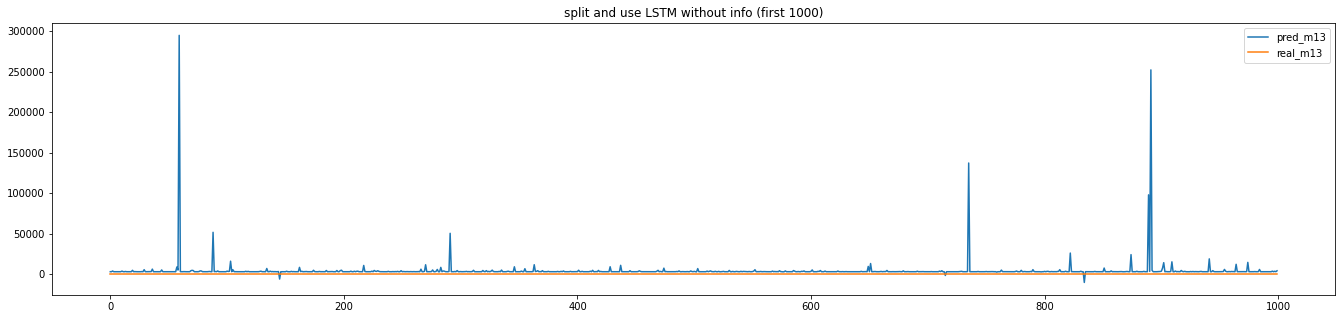

In [ ]:
index = res_lstm.sort_values('real_m13').index
plt.figure(figsize = (23, 5))
# plt.plot(np.arange(0, val_result.shape[0]), val_result['real'][index].values, label = 'real')
plt.plot(np.arange(0, 1000), res_lstm['pred_m13'][index].values[:1000], label = 'pred_m13')
plt.plot(np.arange(0, 1000), res_lstm['real_m13'][index].values[:1000], label = 'real_m13')
plt.title('split and use LSTM without info (first 1000)')
plt.legend()
plt.show()

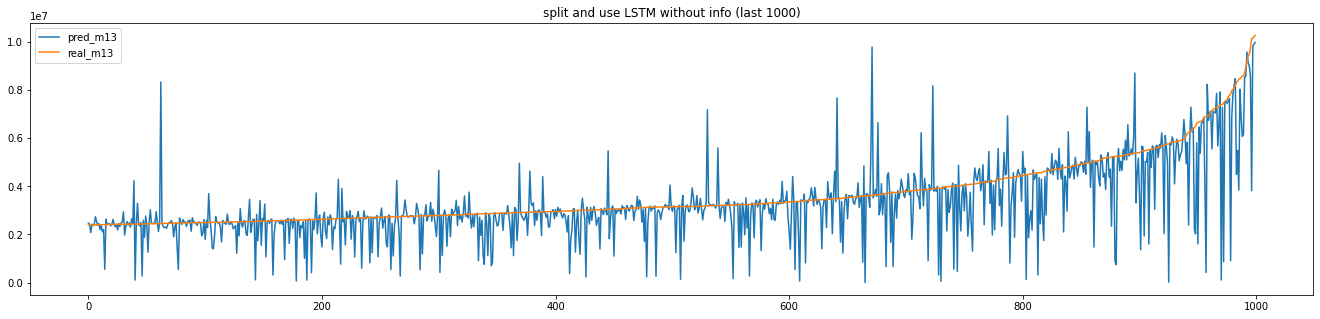

In [ ]:
index = res_lstm.sort_values('real_m13').index
plt.figure(figsize = (23, 5))
# plt.plot(np.arange(0, val_result.shape[0]), val_result['real'][index].values, label = 'real')
plt.plot(np.arange(0, 1000), res_lstm['pred_m13'][index].values[-1000:], label = 'pred_m13')
plt.plot(np.arange(0, 1000), res_lstm['real_m13'][index].values[-1000:], label = 'real_m13')
plt.title('split and use LSTM without info (last 1000)')
plt.legend()
plt.show()

In [ ]:
res = pd.read_csv('test_all_add_result.csv')

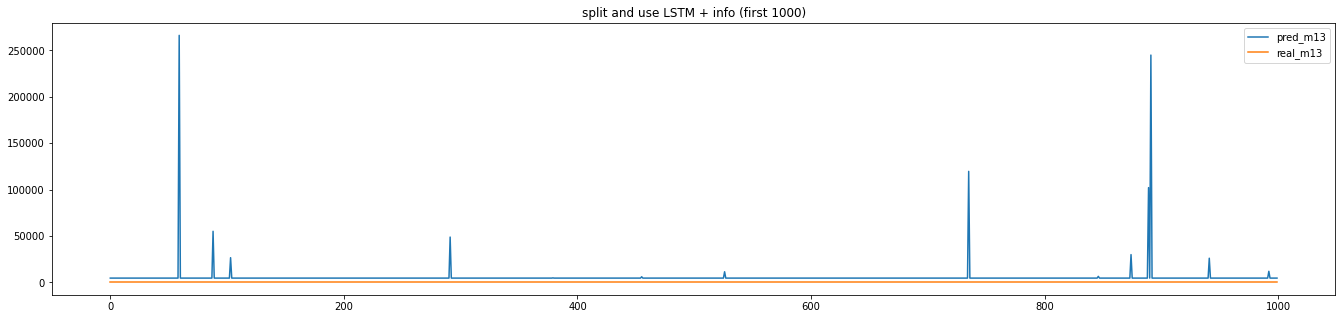

In [ ]:
index = res.sort_values('real_m13').index
plt.figure(figsize = (23, 5))
# plt.plot(np.arange(0, val_result.shape[0]), val_result['real'][index].values, label = 'real')
plt.plot(np.arange(0, 1000), res['pred_m13'][index].values[:1000], label = 'pred_m13')
plt.plot(np.arange(0, 1000), res['real_m13'][index].values[:1000], label = 'real_m13')
plt.title('split and use LSTM + info (first 1000)')
plt.legend()
plt.show()

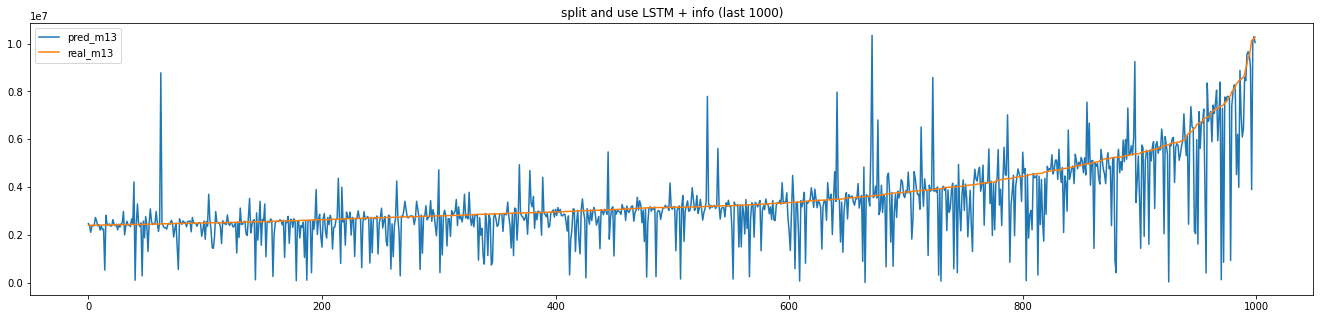

In [ ]:
index = res.sort_values('real_m13').index
plt.figure(figsize = (23, 5))
# plt.plot(np.arange(0, val_result.shape[0]), val_result['real'][index].values, label = 'real')
plt.plot(np.arange(0, 1000), res['pred_m13'][index].values[-1000:], label = 'pred_m13')
plt.plot(np.arange(0, 1000), res['real_m13'][index].values[-1000:], label = 'real_m13')
plt.title('split and use LSTM + info (last 1000)')
plt.legend()
plt.show()